In [1]:
'''
Stock Market is a place where buying and selling of shares happen for publicly
listed companies. Stock exchange is the mediator that allows buting nad selling stocks
1. helps companies to raise capitals
2. Helps Create personal Wealth
3. Serves as an indicator of the state of the economy
4. Helps to increse investment

Stock Market Prediction helps us determine the future value of company stock and other financial 
instruments traded on an exchange

The whole idea is to predict the future price of stocks and gain significant profit

Factors Involved -> 
1. Company performance and Strategies
2. Market Behavior
3. Investor Sentiments (Hold or sell)
4. Global Politics 
5. Physial factors
6. Phychological factors
7. Sudden Disaster
8. Rational and Irrational behavior 
etc...
All these factors make share market dynamic and volatile and predicting stock price 
with high accuracy is very difficult


Learning Algorithm Used 
1. Linear Regression : A supervised learning algorithm to predict the outcome 
                       of a continious variable. It is used to predict
                           a. Total revenue of a company
                           b. Total Unit to be sold of a centain product made by a company
                           c. Weather Prediction 
                           d. Stock Price Prediction
                        The x Axis represents the input variable and the Y axis is the target variable 
                        Formula : Y = mX + C (And we have to find the best fit line : Least squard distance) 
                             

'''

'\nStock Market is a place where buying and selling of shares happen for publicly\nlisted companies. Stock exchange is the mediator that allows buting nad selling stocks\n1. helps companies to raise capitals\n2. Helps Create personal Wealth\n3. Serves as an indicator of the state of the economy\n4. Helps to increse investment\n\nStock Market Prediction helps us determine the future value of company stock and other financial \ninstruments traded on an exchange\n\nThe whole idea is to predict the future price of stocks and gain significant profit\n\nFactors Involved -> \n1. Company performance and Strategies\n2. Market Behavior\n3. Investor Sentiments (Hold or sell)\n4. Global Politics \n5. Physial factors\n6. Phychological factors\n7. Sudden Disaster\n8. Rational and Irrational behavior \netc...\nAll these factors make share market dynamic and volatile and predicting stock price \nwith high accuracy is very difficult\n\n\nLearning Algorithm Used \n1. Linear Regression : A supervised lea

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import chart_studio.plotly as pt
import plotly.graph_objs as go
from plotly.offline import plot 

#for offline plotting
from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot 
init_notebook_mode(connected=True) 

In [3]:
tesla = pd.read_csv('tesla.csv')
tesla.head()
tesla.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2188,11-03-2019,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2189,12-03-2019,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2190,13-03-2019,283.899994,291.989990,282.700012,288.959991,288.959991,6844700
2191,14-03-2019,292.450012,295.390015,288.290009,289.959991,289.959991,7074200
2192,15-03-2019,283.510010,283.723999,274.399994,275.429993,275.429993,14758243


In [4]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [5]:
#converting the Date column in date time format
tesla['Date'] = pd.to_datetime(tesla['Date'])
tesla.head()

C:\Users\rahul\AppData\Local\Temp\ipykernel_22984\2041746412.py:2: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [6]:
print(f'DataFrame contains stock price between {tesla.Date.min()} to {tesla.Date.max()}')
print(f'Total days of Data Present = {tesla.Date.max()-tesla.Date.min()}')

DataFrame contains stock price between 2010-06-29 00:00:00 to 2019-03-15 00:00:00
Total days of Data Present = 3181 days 00:00:00


In [7]:
tesla.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2193,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,2014-11-04 14:37:15.841313024,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,2012-08-29 00:00:00,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,2014-11-04 00:00:00,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,2017-01-09 00:00:00,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,2019-03-15 00:00:00,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07
std,NaN,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06


<Axes: >

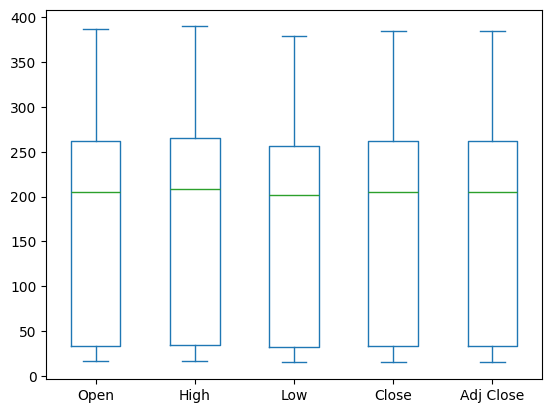

In [8]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [9]:
layout = go.Layout(
    title = 'Stock Price of Tesla',
    xaxis = dict(
        title = 'Date',
        titlefont=dict(
            family = 'Courier New, monospace',
            size = 18,
            color = '#7f7f7f'
        )
    ),
    yaxis=dict(
        title = 'Price',
        titlefont = dict(
            family = 'Courier New, monospace',
            size = 18,
            color = '#7f7f7f'
        )
    )
)
tesla_data = [{'x':tesla['Date'],'y':tesla['Close']}]
plot = go.Figure(data=tesla_data , layout=layout)

In [19]:

import plotly.io as pio
pio.renderers.default = 'browser'
pio.show(plot)

In [11]:
#Building the Regression Model
from sklearn.model_selection import train_test_split

#for preProcessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [12]:
#split the data into train and test sets
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=101)

In [13]:
#Feature Scaling 
scaler = StandardScaler().fit(X_train)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
#Creating Linear Regression Model
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [16]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=tesla_data, layout=layout)

In [17]:
pio.show(plot2)

In [18]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8658871776828707	0.8610649253244574
MSE       1821.3833862936174	1780.987539418845

